In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [123]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [125]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


based on the initial statistics these are the points that I noticed:

Captial Gain and Captial loss = As seen from the above statistics, we can see that more than 90% of the data in these colmns are zero so its irrelevant for our model, so we will delete these

education_num = we also have edcuation field in the dataset which is categorcial column and this seems duplicate of that column, so we will delete this column as well

final weight also seems to be irrelevant so we will delete that as well

I will also delete  relationship clumn because I cant find any crelevance between relationship column and income

In [126]:
data = data.drop (columns=['Capital_gain','Capital_loss','Fnlwgt','Education_num','Relationship'])
data

,Age,Workclass,Education,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


Percent of male getting loan Series([], Name: Sex, dtype: int64)


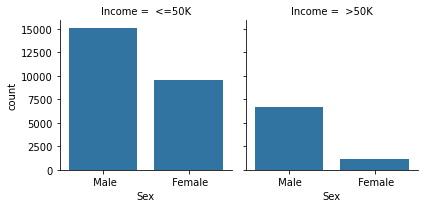

In [48]:
# lets start with comparing gender and income
print('Percent of male getting loan',data[data.Income =='<=50K'].Sex.value_counts())
grid = sns.FacetGrid(data,col='Income')
grid.map(sns.countplot, 'Sex')

In [40]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Education       32560 non-null  object
 3   Marital_status  32560 non-null  object
 4   Occupation      32560 non-null  object
 5   Race            32560 non-null  object
 6   Sex             32560 non-null  object
 7   Hours_per_week  32560 non-null  int64 
 8   Native_country  32560 non-null  object
 9   Income          32560 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.5+ MB


In [66]:
# lets create a list of categorical and contineous data
cat_col = []

for i in data.columns:
    if data[i].dtypes == object:
        cat_col.append(i)
        
print('cat colum --',cat_col)

cat colum -- ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Race', 'Sex', 'Native_country', 'Income']


In [127]:
for i in data[cat_col]:
    data[i] = data[i].str.strip()
    
data

,Age,Workclass,Education,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


In [71]:
data_under50 = data[data.Income =='<=50K']
data_over50 = data[data.Income =='>50K']

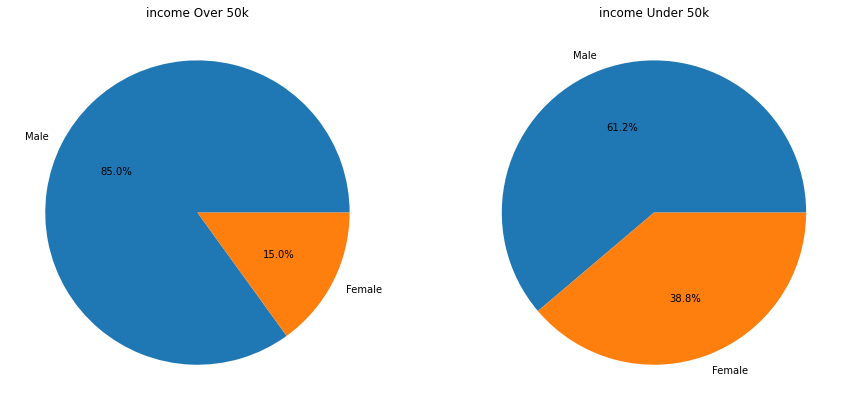

<Figure size 720x720 with 0 Axes>

In [85]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['Sex'].value_counts().index
plt.figure(figsize=(10,10))
ax1.pie(data_over50['Sex'].value_counts(), labels = x1,autopct='%1.1f%%')
ax1.set_title('income Over 50k')
ax2.pie(data_under50['Sex'].value_counts(), labels = x,autopct='%1.1f%%')
ax2.set_title('income Under 50k')
plt.show()

when we compare income based on the gender we can find that out of all the respondant who earns less than 50K 39% of them are female, however when the income goes beyond 50K, the porportion of female respondant reduce drastically to merely 15%

which means that male are more likely to earn more than 50K as compared to female

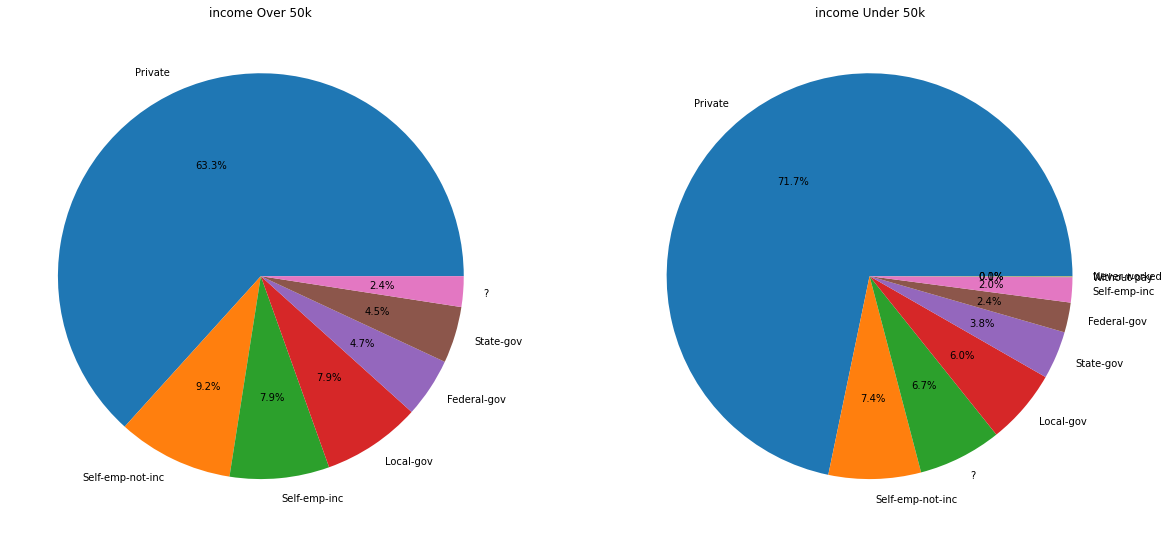

In [88]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20))
x1 = data_over50['Workclass'].value_counts().index
ax1.pie(data_over50['Workclass'].value_counts(), labels = x1,autopct='%1.1f%%')
ax1.set_title('income Over 50k')
x2 = data_under50['Workclass'].value_counts().index
ax2.pie(data_under50['Workclass'].value_counts(), labels = x2,autopct='%1.1f%%')
ax2.set_title('income Under 50k')
plt.show()

when we compare income based on the working class, the data looks pretty much similar for both the im=nome group where private class people dominating both the income group

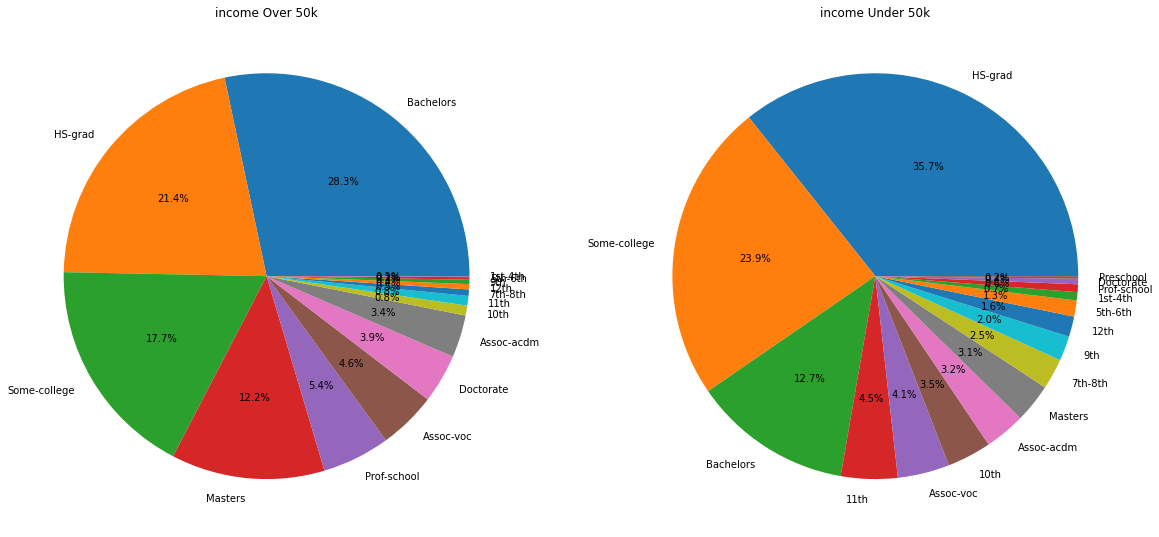

In [94]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20))
x1 = data_over50['Education'].value_counts().index
ax1.pie(data_over50['Education'].value_counts(), labels = x1,autopct='%1.1f%%')
ax1.set_title('income Over 50k')
x2 = data_under50['Education'].value_counts().index
ax2.pie(data_under50['Education'].value_counts(), labels = x2,autopct='%1.1f%%')
ax2.set_title('income Under 50k')
plt.show()

here we see an interesting trend, applicant who earns unders 50k are dominantely HS graduate people, however when we check out the income over 50k, we found that HS graduate appliacnt are replaced by Bachelor students,

so we can conclude that education plays an important role in determining the income of the respondants, so if a respondant is highly educated, it means that the he/she is more likely to fall under income over 50k group

as we can see majority of the repondants belongs to USA, so it is very hard to establish any relation between country and Income

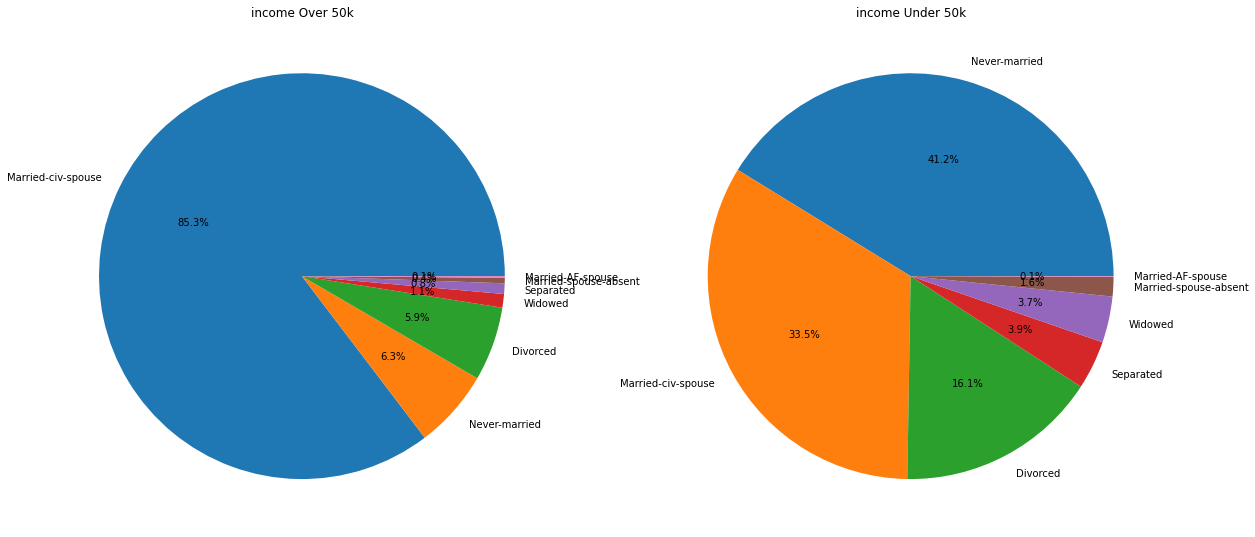

In [96]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20))
x1 = data_over50['Marital_status'].value_counts().index
ax1.pie(data_over50['Marital_status'].value_counts(), labels = x1,autopct='%1.1f%%')
ax1.set_title('income Over 50k')
x2 = data_under50['Marital_status'].value_counts().index
ax2.pie(data_under50['Marital_status'].value_counts(), labels = x2,autopct='%1.1f%%')
ax2.set_title('income Under 50k')
plt.show()

here we see an interesting trend that wheneever an respondant is never married (usually the during 20s or 30s) they tends to get less income, howver when the people get married during the later stage they are most likely to get more responsible position and better income, which is very clearly vsicible in the above pie chart

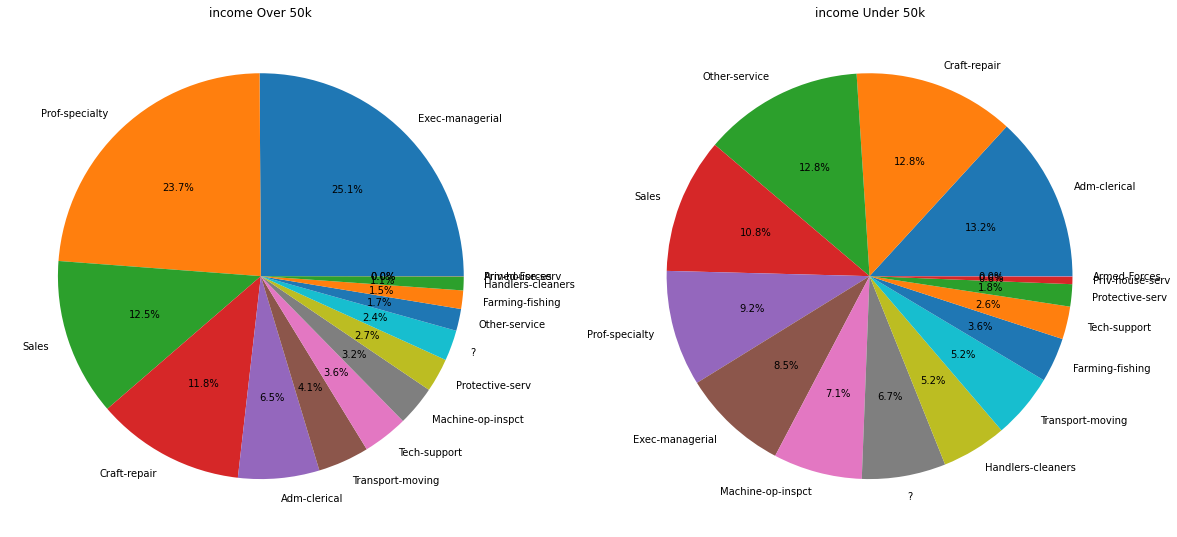

In [98]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20))
x1 = data_over50['Occupation'].value_counts().index
ax1.pie(data_over50['Occupation'].value_counts(), labels = x1,autopct='%1.1f%%')
ax1.set_title('income Over 50k')
x2 = data_under50['Occupation'].value_counts().index
ax2.pie(data_under50['Occupation'].value_counts(), labels = x2,autopct='%1.1f%%')
ax2.set_title('income Under 50k')
plt.show()

for Income group less than 50k there is no perticular trend we can see, however for income over 50K we can see that occupation lik excecutive-managerial, professor in geenral senior position dominates the group with nearly 50% of respondant belongs to these two occupation

<AxesSubplot:xlabel='Sex', ylabel='count'>

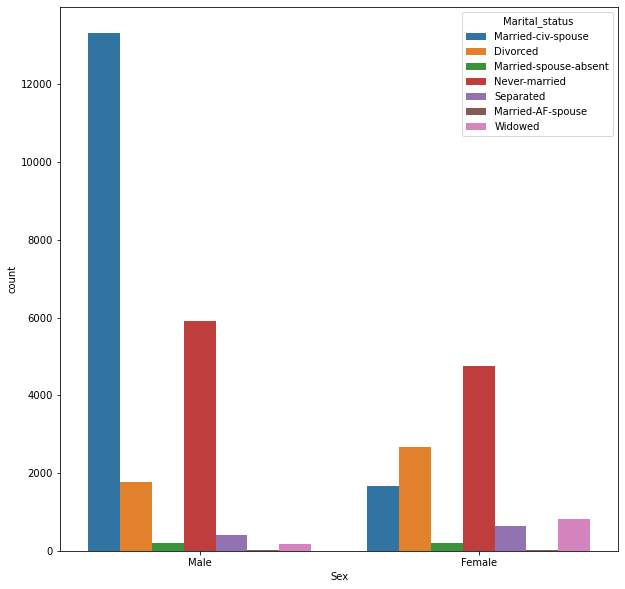

In [108]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Sex'],hue=data['Marital_status'])

when we compare gender based on the marital staus we can see that

Male = most of the male respondant are marrid and followed by never married people

female = however we can see that most of the female who works are never married followed by divorced 

based on the above graph we can say the female is less likely to work after gettin married 

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

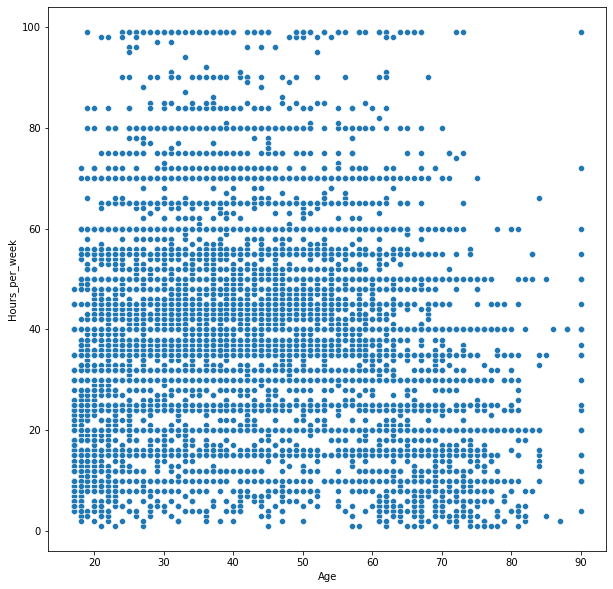

In [112]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Age'],y=data['Hours_per_week'],data=data)

when we compared the age with the hhours worked we can see that there is little positive relation between age and hours worked

so we can conclude that when a respondant is younger than they are more likely to work more number of hour per week, however older people tends to work fewer hour per week

# Data preprocessing

In [113]:
# let check the null values

data.isnull().sum()

Age               0
Workclass         0
Education         0
Marital_status    0
Occupation        0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

we dont have any null values thats a good sign, now lets check if the data is balanced

<=50K    24719
>50K      7841
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

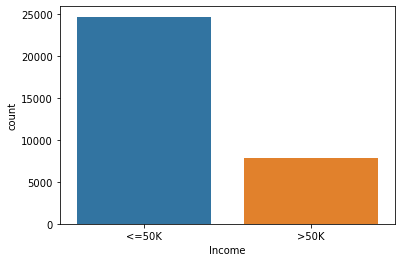

In [115]:
# now check if the data is balanced
print(data['Income'].value_counts())
sns.countplot(x=data['Income'], data=data)

# data is imbalanced, so we well balance the dataset using resampling technique

In [128]:
# as the data is unbalanced we will be balancing the dataset using resampling techniques
from sklearn.utils import resample
data_under50 = data[data.Income =='<=50K']
data_over50 = data[data.Income =='>50K']

data_under50 = resample(data_under50,replace=True,n_samples=8562,random_state=25)

data = pd.concat([data_under50,data_over50])
data

,Age,Workclass,Education,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
8688,34,Private,Some-college,Married-civ-spouse,Craft-repair,White,Male,40,United-States,<=50K
3901,22,?,Some-college,Never-married,?,White,Male,40,United-States,<=50K
1558,21,Private,Some-college,Never-married,Other-service,Black,Female,8,United-States,<=50K
30866,32,Private,10th,Married-spouse-absent,Other-service,Black,Female,37,United-States,<=50K
27936,21,State-gov,Some-college,Never-married,Other-service,Black,Female,12,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
32538,71,?,Doctorate,Married-civ-spouse,?,White,Male,10,United-States,>50K
32544,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,White,Female,20,United-States,>50K
32553,53,Private,Masters,Married-civ-spouse,Exec-managerial,White,Male,40,United-States,>50K
32556,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K


<=50K    8562
>50K     7841
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

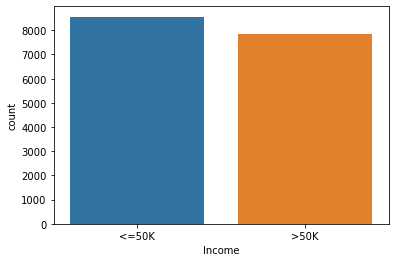

In [129]:
print(data['Income'].value_counts())
sns.countplot(x=data['Income'], data=data)

We have successfully balanced the dataset by deleting records from under 50K income group

In [131]:
print(cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Race', 'Sex', 'Native_country', 'Income']


#### encoding the data

In [132]:
from sklearn.preprocessing import LabelEncoder

data[cat_col[0]] = LabelEncoder().fit_transform(data[cat_col[0]])
data[cat_col[1]] = LabelEncoder().fit_transform(data[cat_col[1]])
data[cat_col[2]] = LabelEncoder().fit_transform(data[cat_col[2]])
data[cat_col[3]] = LabelEncoder().fit_transform(data[cat_col[3]])
data[cat_col[4]] = LabelEncoder().fit_transform(data[cat_col[4]])
data[cat_col[5]] = LabelEncoder().fit_transform(data[cat_col[5]])
data[cat_col[6]] = LabelEncoder().fit_transform(data[cat_col[6]])
data[cat_col[7]] = LabelEncoder().fit_transform(data[cat_col[7]])
data
# we have encoded the data

,Age,Workclass,Education,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
8688,34,4,15,2,3,4,1,40,39,0
3901,22,0,15,4,0,4,1,40,39,0
1558,21,4,15,4,8,2,0,8,39,0
30866,32,4,0,3,8,2,0,37,39,0
27936,21,7,15,4,8,2,0,12,39,0
...,...,...,...,...,...,...,...,...,...,...
32538,71,0,10,2,0,4,1,10,39,1
32544,39,2,7,2,1,4,0,20,39,1
32553,53,4,12,2,4,4,1,40,39,1
32556,40,4,11,2,7,4,1,40,39,1


# 

<AxesSubplot:>

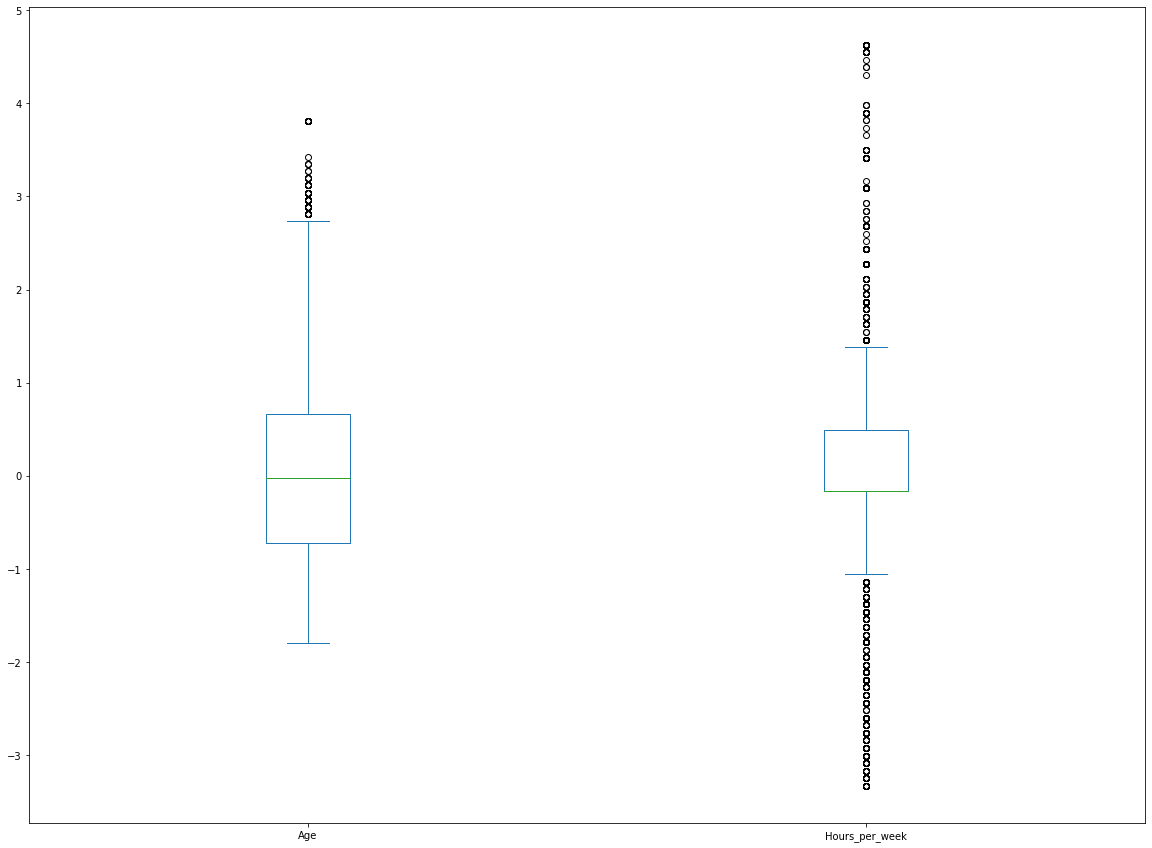

In [136]:
# lets check for the ouliers
from scipy.stats import zscore

zscore(data[['Age','Hours_per_week']]).plot(kind='box',figsize=(20,15))

In [137]:
# we will use zscore to remove the outlier from the data

z_score= np.abs(zscore(data[['Age','Hours_per_week']]))

data = data[(z_score<3).all(axis=1)]
data

,Age,Workclass,Education,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
8688,34,4,15,2,3,4,1,40,39,0
3901,22,0,15,4,0,4,1,40,39,0
1558,21,4,15,4,8,2,0,8,39,0
30866,32,4,0,3,8,2,0,37,39,0
27936,21,7,15,4,8,2,0,12,39,0
...,...,...,...,...,...,...,...,...,...,...
32538,71,0,10,2,0,4,1,10,39,1
32544,39,2,7,2,1,4,0,20,39,1
32553,53,4,12,2,4,4,1,40,39,1
32556,40,4,11,2,7,4,1,40,39,1


<AxesSubplot:>

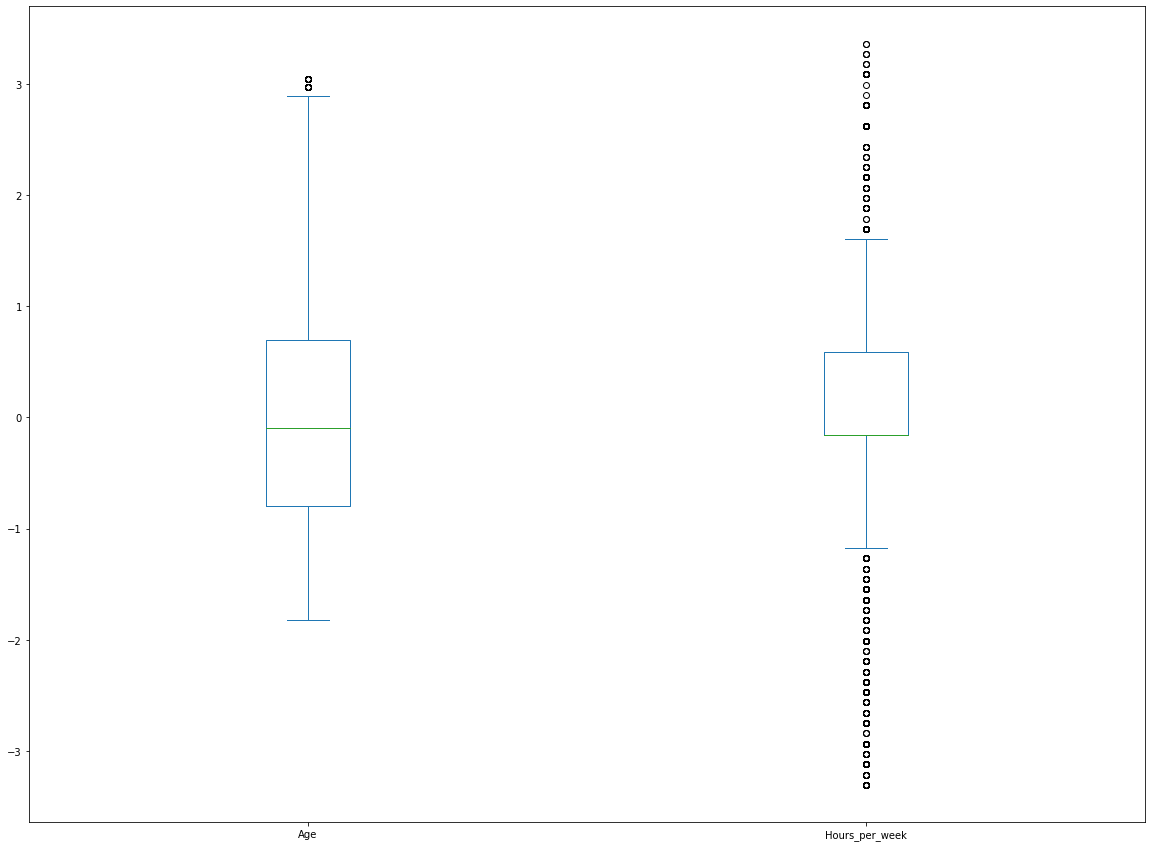

In [138]:
zscore(data[['Age','Hours_per_week']]).plot(kind='box',figsize=(20,15))

we have successfully removed outliers from the data

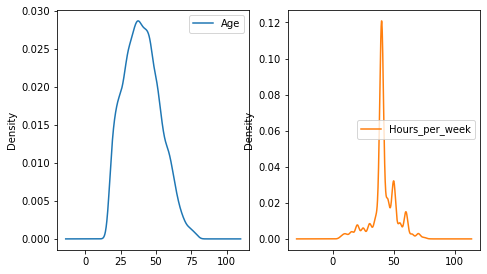

Age               0.321455
Hours_per_week   -0.275008
dtype: float64

In [139]:
# lets see how the data is distributed for contineous column

data[['Age','Hours_per_week']].plot(kind='density',subplots=True,sharex=False,figsize=(20,15),layout=(3,5))
plt.show()
data[['Age','Hours_per_week']].skew()

we see little bit of skewness in the dataset, we will deal wiht it but first we will divide the data into feature and label

In [155]:
# spliting the data into label and features
X = data.drop(columns='Income')
y = data['Income']

X.sample(15)

,Age,Workclass,Education,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country
21197,71,5,15,2,4,4,1,50,39
380,46,4,4,0,3,4,0,45,39
4248,68,4,9,2,12,4,1,30,39
691,42,4,15,2,10,4,1,50,39
9867,36,4,9,2,4,4,1,40,39
10549,46,4,12,2,4,4,1,45,39
7921,25,4,11,5,4,4,0,40,39
1202,44,4,9,4,8,4,1,40,39
27927,61,4,11,2,1,4,1,40,39
15579,42,0,1,2,0,4,1,22,7


<AxesSubplot:>

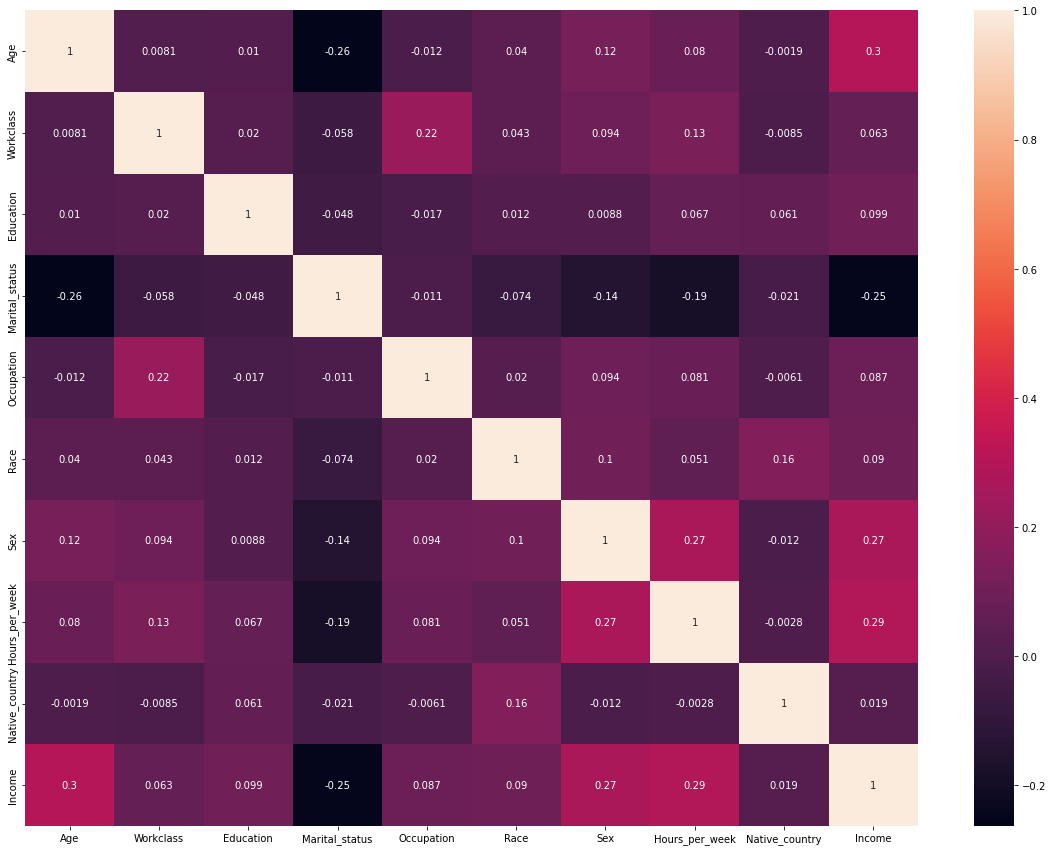

In [144]:
# now lets check if there is multicolinearity between the features

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

##### No sign of multicolinearity

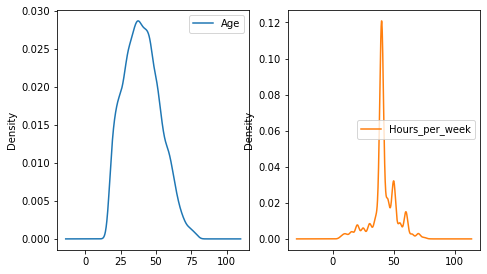

Age               0.321455
Hours_per_week   -0.275008
dtype: float64

In [156]:
X[['Age','Hours_per_week']].plot(kind='density',subplots=True,sharex=False,figsize=(20,15),layout=(3,5))
plt.show()
X[['Age','Hours_per_week']].skew()

I will not be removing any skewness, because skewness of both the columns lies between +.35 and -.35 which is acceptable

# Scaling the data


In [157]:
# scaled data using standard scalar
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)
x_scaled

array([[-0.48326578,  0.06387056,  1.26507815, ...,  0.62206796,
        -0.15550337,  0.28519793],
       [-1.42490215, -2.72557829,  1.26507815, ...,  0.62206796,
        -0.15550337,  0.28519793],
       [-1.50337184,  0.06387056,  1.26507815, ..., -1.60754141,
        -3.1192309 ,  0.28519793],
       ...,
       [ 1.00765848,  0.06387056,  0.42825062, ...,  0.62206796,
        -0.15550337,  0.28519793],
       [-0.01244759,  0.06387056,  0.14930811, ...,  0.62206796,
        -0.15550337,  0.28519793],
       [ 0.92918878,  0.76123277,  0.14930811, ..., -1.60754141,
        -0.15550337,  0.28519793]])

# Training the data

All the preprocessing  and the scaling of the data has been done, now we will train the model

I will be using follwoing model for prediction:
    
    Logisitics Regression
    Knn
    DecsionTree
    Random Forest


###### Identifying best random state for logisitics regression

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, auc
# best the best random state for Logistic regrssion model
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    lm = LogisticRegression()
    lm.fit(x_train,y_train)
    y_pred = lm.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = lm.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7202492211838006 random state - 0
Accurancy Score -  0.7230529595015577 random state - 13
Accurancy Score -  0.7255451713395639 random state - 52


###### Confusion matrix and clssification report - Logistics Regression

In [160]:
#the random state from logisitics regression is 89, so we will use to generate confusion matrix and classification report
# we got best result from random forest classifier we will use that result
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=52)
lm = LogisticRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = lm.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 72.55451713395638 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.74      0.71      0.73      1638
           1       0.71      0.74      0.73      1572

    accuracy                           0.73      3210
   macro avg       0.73      0.73      0.73      3210
weighted avg       0.73      0.73      0.73      3210

[[1165  473]
 [ 408 1164]]


###### Identifying best random state for KNN

In [161]:
# best the best random state for Knn model
from sklearn.neighbors import KNeighborsClassifier
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = knn.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7797507788161994 random state - 0
Accurancy Score -  0.7822429906542057 random state - 5
Accurancy Score -  0.7841121495327102 random state - 13
Accurancy Score -  0.7869158878504673 random state - 26


###### Confusion matrix and clssification report - KNN

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=26)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = knn.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 78.69158878504673 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1620
           1       0.78      0.79      0.79      1590

    accuracy                           0.79      3210
   macro avg       0.79      0.79      0.79      3210
weighted avg       0.79      0.79      0.79      3210

[[1273  347]
 [ 337 1253]]


###### Identifying best random state for Decision Tree

In [163]:
# best the best random state for Decision tree model
from sklearn.tree import DecisionTreeClassifier

ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = dt.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7750778816199377 random state - 0
Accurancy Score -  0.7763239875389408 random state - 13
Accurancy Score -  0.7813084112149533 random state - 72


###### Confusion matrix and clssification report - Decision Tree

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=72)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = dt.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 77.97507788161994 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.76      0.83      0.80      1661
           1       0.80      0.72      0.76      1549

    accuracy                           0.78      3210
   macro avg       0.78      0.78      0.78      3210
weighted avg       0.78      0.78      0.78      3210

[[1381  280]
 [ 427 1122]]


###### Identifying best random state for Random Forest

In [165]:
# best the best random state for Random forest classifier model
from sklearn.ensemble import RandomForestClassifier
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = rf.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.822429906542056 random state - 0
Accurancy Score -  0.8249221183800624 random state - 26


###### Confusion matrix and clssification report - Random Forest

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=26)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 82.77258566978193 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1620
           1       0.83      0.82      0.82      1590

    accuracy                           0.83      3210
   macro avg       0.83      0.83      0.83      3210
weighted avg       0.83      0.83      0.83      3210

[[1359  261]
 [ 292 1298]]


##### ROC AUC Curve

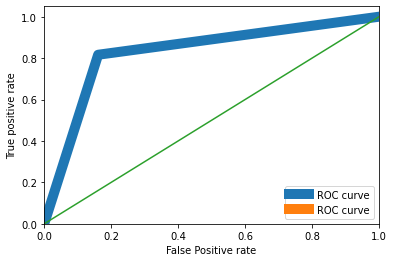

In [170]:
fpr,tpr,th = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,roc_auc,lw=10,label='ROC curve' % roc_auc)
plt.plot([0,1],[0,1])
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

##### Hyper Parameter tuning

In [171]:
from sklearn.model_selection import GridSearchCV
param = {'criterion':['gini','entropy'],'min_samples_leaf': range(1,5),'min_samples_split': range(1,5),'max_depth':range(1,5)}

grd = GridSearchCV(rf, param_grid=param)

grd.fit(x_train, y_train)

print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [191]:
rf = RandomForestClassifier(criterion='gini', max_depth=17, min_samples_leaf=1,min_samples_split=5)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_pred,y_test)
pacc

0.8317757009345794

In [192]:
ri = 0
acc = 0
for i in range(1,100):
    rf = RandomForestClassifier(criterion='gini', max_depth=17, min_samples_leaf=1,min_samples_split=5,random_state=i)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_pred,y_test)

    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8311526479750779 random state - 1
Accurancy Score -  0.8342679127725857 random state - 2
Accurancy Score -  0.8345794392523365 random state - 6
Accurancy Score -  0.835202492211838 random state - 31
Accurancy Score -  0.8355140186915888 random state - 40
Accurancy Score -  0.8364485981308412 random state - 79


We have abeen able to improve the result by around 1% with new parameters which is very good so we will go ahead and use the new parameter

In [193]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=26)
rf = RandomForestClassifier(criterion='gini', max_depth=17, min_samples_leaf=1,min_samples_split=5,random_state=79)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 83.64485981308411 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1620
           1       0.82      0.86      0.84      1590

    accuracy                           0.84      3210
   macro avg       0.84      0.84      0.84      3210
weighted avg       0.84      0.84      0.84      3210

[[1320  300]
 [ 225 1365]]


##### Saving the best Model - Random Forest

In [194]:
import pickle

filename = 'final_model.pkl'
pickle.dump(rf, open('rf.pkl', 'wb'))